In [1]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
data = pd.read_csv(fileURL, header = 0)
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [12]:
from sklearn.cross_validation import train_test_split
X = data[[0,1,2,3]]
Y = data[[4]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=3)

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=16, max_depth=5)
clf = clf.fit(x_train, y_train)

In [4]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
from IPython.display import Image
blood_feature = ['Recency(months)', 'Frequency(times)', 'Monetary(c.c. blood)', 'Time(months)']
blood_class = ['No', 'Yes']

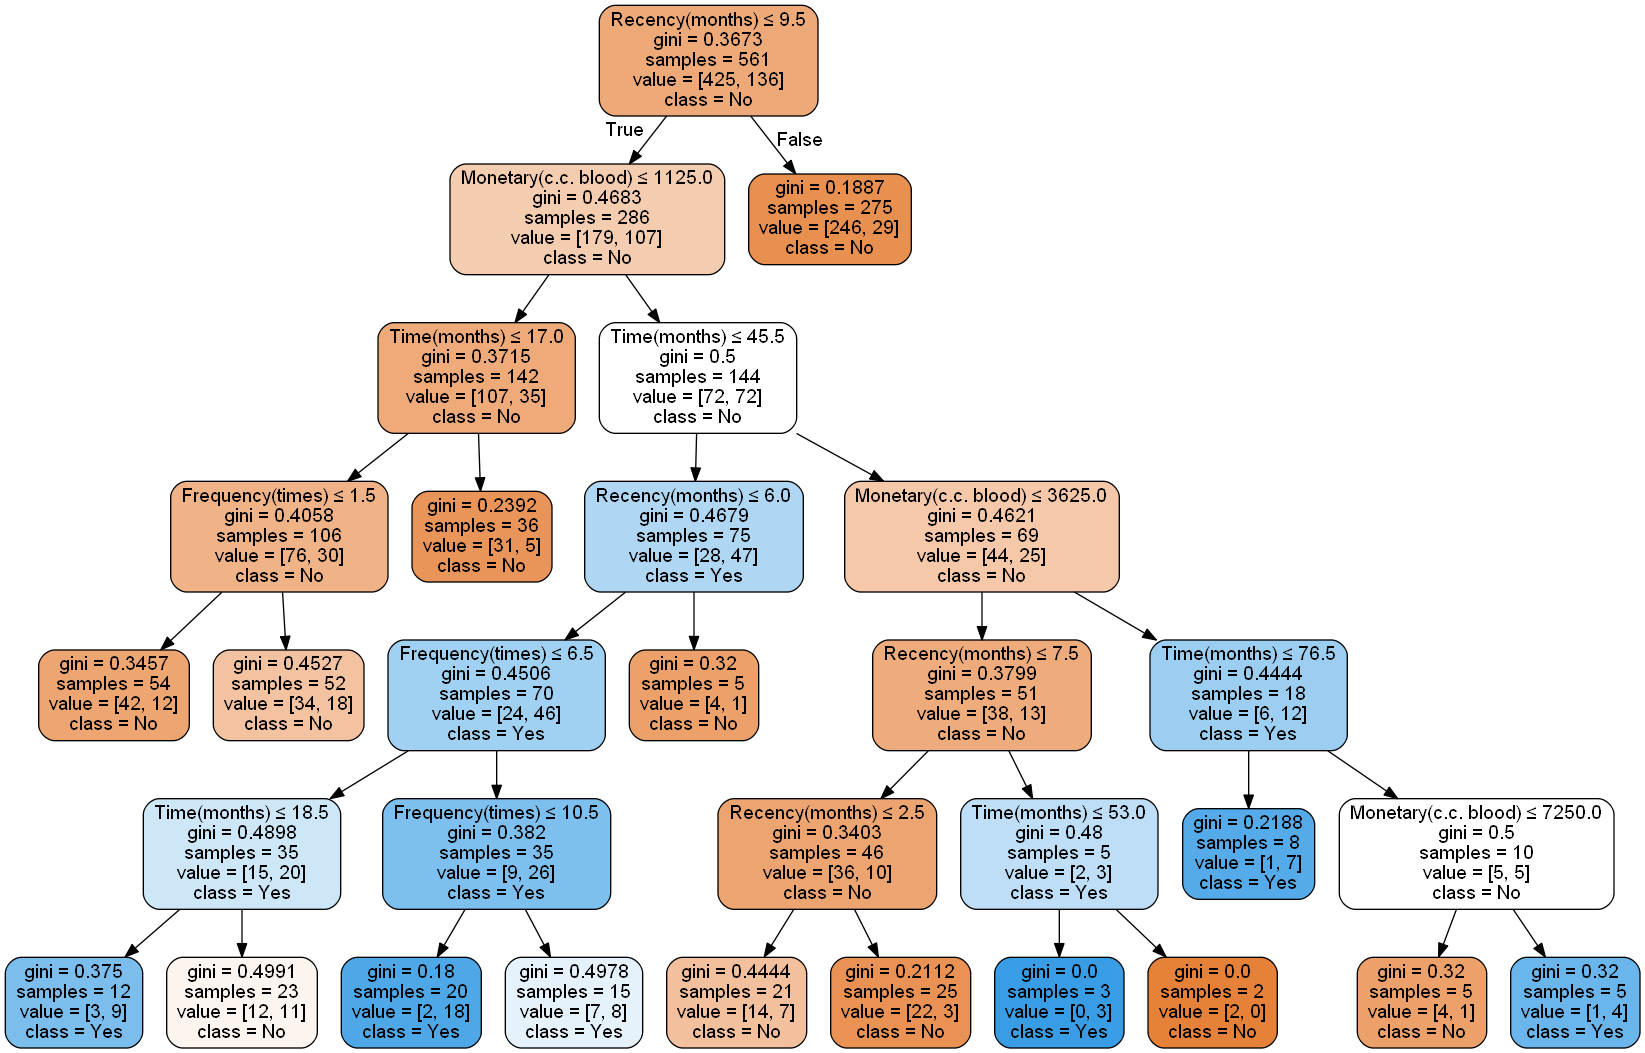

In [5]:
dot_data = tree.export_graphviz(clf, out_file = None,
                               feature_names = blood_feature,
                               class_names = blood_class,
                               filled = True, rounded = True,
                               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### 1. The accuracy of your model on the test data

In [6]:
y_predict = clf.predict(x_test)

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.79679144385026734

From the accuracy score we can see that over 79% of the test instances are correctly predicted. This classifier is better than randomly setting instaces into classes. But in my opinion, this accuracy score is not good enough. Nearly for every 5 instances, it generates one wrong prediction.

#### 2. The precision and recall values

In [8]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.57692307692307687

In [9]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.35714285714285715

The results show that the precision is 0.5769, which means among positive labeled instances, over 57% of them are correctly labeled as positive. 

The recall is 0.3571, which means among the actual positive instances, over 35% of them are correctly predicted as positive. 

Even though we want both precision and recall to be as high as possible, usually we are not able to reach this goal. So we can choose the value depend on the condition. 

#### 3. A classification report

In [10]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_predict, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.83      0.92      0.88       145
    class 1       0.58      0.36      0.44        42

avg / total       0.77      0.80      0.78       187



We should choose class 1 as positive because it's the minority class(the one with fewer occurrences). So based on the 

F1 score is a metric which could balance between precision and recall. The higher F1 score represent a more ideal model.

Besides, those average values combined precision and recall. They are pretty good evaluation metrics.

#### 4. The confusion matrix for this experiment

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[134  11]
 [ 27  15]]
Normalized confusion matrix
[[ 0.92  0.08]
 [ 0.64  0.36]]


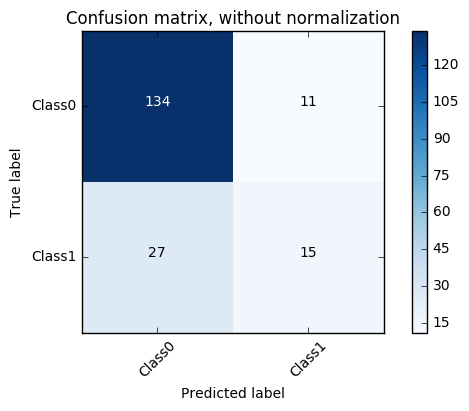

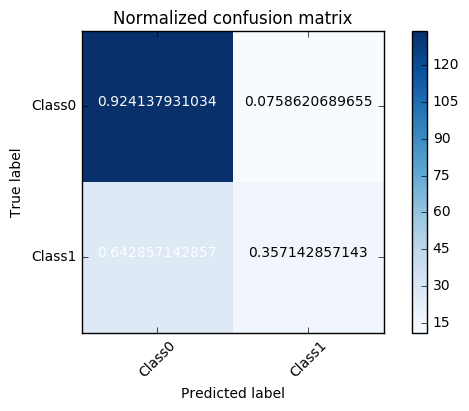

In [11]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
c_name = ['Class0', 'Class1']
plot_confusion_matrix(cnf_matrix, classes=c_name,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=c_name, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

The confusion matrix tell us the relationship of actual and predicted classes. It divide the result into four subsets. In order to choose the minority class as positive, in this matrix, there are 15 instances belong to TP, 27 instances belong to FN, 11 instances belong to FP and 134 instances belong to FN. These four subsets could help us computing other important metrics.

#### 5. An ROC curve

In [15]:
y_score = clf.predict_proba(x_test)
y_new_test = np.array(y_test)

In [116]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(y_new_test[:, 0], y_score[:, 1])
roc_auc[0] = auc(fpr[0], tpr[0]) 

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_new_test.ravel(), y_score[:, 1].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


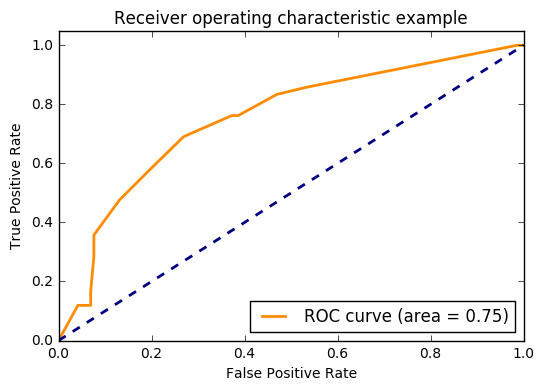

In [117]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In ROC curve, the X axis is FPR and Y axis is TPR. The ideal model is at the point (0,1) because it would has 100% TPR and 0% FPR. Besides, we can see that our model's cover area is 0.75, which is an acceptable result, because we wish to have this value as close to 1 as possible.

#### 6. A Precision/Recall curve

Automatically created module for IPython interactive environment


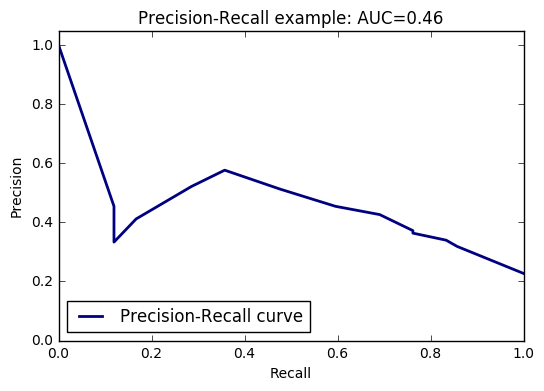

In [119]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
lw = 2

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
precision[0], recall[0], _ = precision_recall_curve(y_new_test[:, 0], y_score[:, 1])
average_precision[0] = average_precision_score(y_new_test[:, 0], y_score[:, 1])


# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_new_test.ravel(), y_score[:, 1].ravel())
average_precision["micro"] = average_precision_score(y_new_test, y_score[:, 1], average="micro")

# Plot Precision-Recall curve
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()

As I have mentioned before, we can't always keep both precision and recall being high value. The ideal model is at the point (1,1). The relationship between these two metrics is shown on this plot. Our model doesn't perform well according to this plot because there is a huge blank between the curve and the upper right boundary. We need to decide to use which pair of values depend on different situations.

In general, our model is lot better than random guessing, but it still need to be improved in many aspects.